In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
from pysb import *
from pysb.export import export
from pysb.bng import generate_network, generate_equations
from pysb.pathfinder import set_path
from pysb.simulator import ScipyOdeSimulator, BngSimulator, KappaSimulator
from pylab import linspace, plot, xlabel, ylabel, show

import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')
set_path('kasim', '/opt/git-repositories/KaSim4.Kappa-Dev/')

In [3]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7fcc09b03f28>

In [4]:
Monomer('dna', ['name', 'type', 'prot', 'free', 'rna', 'up', 'dw'], 
        { 'name' : ['rpoA', 'rpoB', 'rpoC', 'rpoD', 'rpoE', 'rpoH', 'rpoN', 'rpoS', 'fliA', 'fecI'], 
          'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2', 'BS'],
          'free' : ['True', 'False']})

Monomer('rna', ['name', 'type', 'dna', 'prot'], 
        { 'name' : ['rpoA', 'rpoB', 'rpoC', 'rpoD', 'rpoE', 'rpoH', 'rpoN', 'rpoS', 'fliA', 'fecI'], 
          'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'],
        { 'name' : ['rpoA', 'rpoB', 'rpoC', 'rpoD', 'rpoE', 'rpoH', 'rpoN', 'rpoS', 'fliA', 'fecI'], 
         'loc' : ['cyt', 'mem', 'per', 'ex'] })

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'], {'name': ['rpoA', 'rpoB', 'rpoC', 'rpoD', 'rpoE', 'rpoH', 'rpoN', 'rpoS', 'fliA', 'fecI'], 'loc': ['cyt', 'mem', 'per', 'ex']})

In [5]:
Rule('ProtProt_AssemblyRule_1', 
    prot(name = 'rpoA', dna = None, up = None, dw = None) +
    prot(name = 'rpoA', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_1', 1),
    Parameter('rvs_ProtProt_AssemblyRule_1', 1))

Rule('ProtProt_AssemblyRule_2', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = None) +
    prot(name = 'rpoB', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_2', 1),
    Parameter('rvs_ProtProt_AssemblyRule_2', 1))

Rule('ProtProt_AssemblyRule_3', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = None) +
    prot(name = 'rpoC', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_3', 1),
    Parameter('rvs_ProtProt_AssemblyRule_3', 1))

Rule('ProtProt_AssemblyRule_4', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'rpoD', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_4', 1),
    Parameter('rvs_ProtProt_AssemblyRule_4', 1))

Rule('ProtProt_AssemblyRule_5', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'rpoE', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_5', 1),
    Parameter('rvs_ProtProt_AssemblyRule_5', 1))

Rule('ProtProt_AssemblyRule_6', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'rpoH', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_6', 1),
    Parameter('rvs_ProtProt_AssemblyRule_6', 1))

Rule('ProtProt_AssemblyRule_7', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'rpoN', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_7', 1),
    Parameter('rvs_ProtProt_AssemblyRule_7', 1))

Rule('ProtProt_AssemblyRule_8', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'rpoS', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_8', 1),
    Parameter('rvs_ProtProt_AssemblyRule_8', 1))

Rule('ProtProt_AssemblyRule_9', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'fliA', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_9', 1),
    Parameter('rvs_ProtProt_AssemblyRule_9', 1))

Rule('ProtProt_AssemblyRule_11', 
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = None) +
    prot(name = 'fecI', dna = None, up = None, dw = None) |
    prot(name = 'rpoA', dna = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, up = 3, dw = 4) %
    prot(name = 'fecI', dna = None, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_11', 1),
    Parameter('rvs_ProtProt_AssemblyRule_11', 1))

Rule('ProtProt_AssemblyRule_11', prot(name='rpoA', dna=None, up=None, dw=1) % prot(name='rpoA', dna=None, up=1, dw=2) % prot(name='rpoB', dna=None, up=2, dw=3) % prot(name='rpoC', dna=None, up=3, dw=None) + prot(name='fecI', dna=None, up=None, dw=None) | prot(name='rpoA', dna=None, up=None, dw=1) % prot(name='rpoA', dna=None, up=1, dw=2) % prot(name='rpoB', dna=None, up=2, dw=3) % prot(name='rpoC', dna=None, up=3, dw=4) % prot(name='fecI', dna=None, up=4, dw=None), fwd_ProtProt_AssemblyRule_11, rvs_ProtProt_AssemblyRule_11)

In [6]:
# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoA_pro1
Rule('docking_1_rpoA_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_1_rpoA_pro1', 1),
    Parameter('rvs_docking_1_rpoA_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoB_pro1
Rule('docking_2_rpoB_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoB', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoB', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_2_rpoB_pro1', 1),
    Parameter('rvs_docking_2_rpoB_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoD_pro1
Rule('docking_3_rpoD_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_3_rpoD_pro1', 1),
    Parameter('rvs_docking_3_rpoD_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoE_pro1
Rule('docking_4_rpoE_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoE', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoE', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_4_rpoE_pro1', 1),
    Parameter('rvs_docking_4_rpoE_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoH_pro1
Rule('docking_5_rpoH_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_5_rpoH_pro1', 1),
    Parameter('rvs_docking_5_rpoH_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoN_pro1
Rule('docking_6_rpoN_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_6_rpoN_pro1', 1),
    Parameter('rvs_docking_6_rpoN_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_rpoS_pro1
Rule('docking_7_rpoS_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoS', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoS', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_7_rpoS_pro1', 1),
    Parameter('rvs_docking_7_rpoS_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_fliA_pro1
Rule('docking_8_fliA_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'fliA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fliA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_8_fliA_pro1', 1),
    Parameter('rvs_docking_8_fliA_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] interacts with BS_fecI_pro1
Rule('docking_9_fecI_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'fecI', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fecI', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_9_fecI_pro1', 1),
    Parameter('rvs_docking_9_fecI_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] interacts with BS_rpoD_pro1
Rule('docking_10_rpoD_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_10_rpoD_pro1', 1),
    Parameter('rvs_docking_10_rpoD_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] interacts with BS_rpoE_pro1
Rule('docking_11_rpoE_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoE', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoE', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_11_rpoE_pro1', 1),
    Parameter('rvs_docking_11_rpoE_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] interacts with BS_rpoH_pro1
Rule('docking_12_rpoH_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_12_rpoH_pro1', 1),
    Parameter('rvs_docking_12_rpoH_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] interacts with BS_rpoN_pro1
Rule('docking_13_rpoN_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_13_rpoN_pro1', 1),
    Parameter('rvs_docking_13_rpoN_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoH] interacts with BS_rpoA_pro1
Rule('docking_14_rpoA_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_14_rpoA_pro1', 1),
    Parameter('rvs_docking_14_rpoA_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoH] interacts with BS_rpoD_pro1
Rule('docking_15_rpoD_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_15_rpoD_pro1', 1),
    Parameter('rvs_docking_15_rpoD_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoN] interacts with BS_rpoA_pro1
Rule('docking_16_rpoA_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_16_rpoA_pro1', 1),
    Parameter('rvs_docking_16_rpoA_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoN] interacts with BS_rpoD_pro1
Rule('docking_17_rpoD_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_17_rpoD_pro1', 1),
    Parameter('rvs_docking_17_rpoD_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoN] interacts with BS_rpoH_pro1
Rule('docking_18_rpoH_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_18_rpoH_pro1', 1),
    Parameter('rvs_docking_18_rpoH_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_fecI_pro1
Rule('docking_19_fecI_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'fecI', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fecI', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_19_fecI_pro1', 1),
    Parameter('rvs_docking_19_fecI_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_rpoA_pro1
Rule('docking_20_rpoA_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_20_rpoA_pro1', 1),
    Parameter('rvs_docking_20_rpoA_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_rpoB_pro1
Rule('docking_21_rpoB_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoB', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoB', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_21_rpoB_pro1', 1),
    Parameter('rvs_docking_21_rpoB_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_rpoD_pro1
Rule('docking_22_rpoD_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_22_rpoD_pro1', 1),
    Parameter('rvs_docking_22_rpoD_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_rpoE_pro1
Rule('docking_23_rpoE_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoE', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoE', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_23_rpoE_pro1', 1),
    Parameter('rvs_docking_23_rpoE_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_rpoH_pro1
Rule('docking_24_rpoH_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_24_rpoH_pro1', 1),
    Parameter('rvs_docking_24_rpoH_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] interacts with BS_rpoN_pro1
Rule('docking_25_rpoN_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_25_rpoN_pro1', 1),
    Parameter('rvs_docking_25_rpoN_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, fliA] interacts with BS_rpoD_pro1
Rule('docking_26_rpoD_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_26_rpoD_pro1', 1),
    Parameter('rvs_docking_26_rpoD_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, fliA] interacts with BS_rpoN_pro1
Rule('docking_27_rpoN_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_27_rpoN_pro1', 1),
    Parameter('rvs_docking_27_rpoN_pro1', 1))

# [rpoA, rpoA, rpoB, rpoC, fliA] interacts with BS_fliA_pro1
Rule('docking_28_fliA_pro1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = None, met = None, up = 4, dw = None) +
    dna(name = 'fliA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fliA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_docking_28_fliA_pro1', 1),
    Parameter('rvs_docking_28_fliA_pro1', 1))

Rule('docking_28_fliA_pro1', prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=None, met=None, up=3, dw=4) % prot(name='fliA', dna=None, met=None, up=4, dw=None) + dna(name='fliA', type='pro1', prot=None, free='True', up=WILD, dw=WILD) | prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=None, met=None, up=3, dw=4) % prot(name='fliA', dna=5, met=None, up=4, dw=None) % dna(name='fliA', type='pro1', prot=5, free='False', up=WILD, dw=WILD), fwd_docking_28_fliA_pro1, rvs_docking_28_fliA_pro1)

In [7]:
# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoA_rbs
Rule('sliding_1_rpoA_pro1_to_rpoA_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoA', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_1_rpoA_pro1_to_rpoA_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoB_rbs
Rule('sliding_2_rpoB_pro1_to_rpoB_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoB', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoB', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoB', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_2_rpoB_pro1_to_rpoB_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoD_rbs
Rule('sliding_3_rpoD_pro1_to_rpoD_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_3_rpoD_pro1_to_rpoD_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoE_rbs
Rule('sliding_4_rpoE_pro1_to_rpoE_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoE', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoE', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoE', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_4_rpoE_pro1_to_rpoE_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoH_rbs
Rule('sliding_5_rpoH_pro1_to_rpoH_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoH', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoH', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_5_rpoH_pro1_to_rpoH_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoN_rbs
Rule('sliding_6_rpoN_pro1_to_rpoN_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoN', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoN', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_6_rpoN_pro1_to_rpoN_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to rpoS_rbs
Rule('sliding_7_rpoS_pro1_to_rpoS_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoS', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoS', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoS', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoS', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoS', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_7_rpoS_pro1_to_rpoS_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to fliA_rbs
Rule('sliding_8_fliA_pro1_to_fliA_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fliA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'fliA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'fliA', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_8_fliA_pro1_to_fliA_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] slides to fecI_rbs
Rule('sliding_9_fecI_pro1_to_fecI_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoD', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fecI', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoD', dna = None, met = None, up = None, dw = None) %
    dna(name = 'fecI', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'fecI', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_9_fecI_pro1_to_fecI_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] slides to rpoD_rbs
Rule('sliding_10_rpoD_pro1_to_rpoD_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoE', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_10_rpoD_pro1_to_rpoD_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] slides to rpoE_rbs
Rule('sliding_11_rpoE_pro1_to_rpoE_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoE', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoE', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoE', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoE', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_11_rpoE_pro1_to_rpoE_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] slides to rpoH_rbs
Rule('sliding_12_rpoH_pro1_to_rpoH_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoE', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoH', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoH', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_12_rpoH_pro1_to_rpoH_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoE] slides to rpoN_rbs
Rule('sliding_13_rpoN_pro1_to_rpoN_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoE', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoE', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoN', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoN', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_13_rpoN_pro1_to_rpoN_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoH] slides to rpoA_rbs
Rule('sliding_14_rpoA_pro1_to_rpoA_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoH', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoA', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_14_rpoA_pro1_to_rpoA_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoH] slides to rpoD_rbs
Rule('sliding_15_rpoD_pro1_to_rpoD_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoH', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoH', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_15_rpoD_pro1_to_rpoD_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoN] slides to rpoA_rbs
Rule('sliding_16_rpoA_pro1_to_rpoA_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoN', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoA', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_16_rpoA_pro1_to_rpoA_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoN] slides to rpoD_rbs
Rule('sliding_17_rpoD_pro1_to_rpoD_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoN', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_17_rpoD_pro1_to_rpoD_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoN] slides to rpoH_rbs
Rule('sliding_18_rpoH_pro1_to_rpoH_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoN', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoN', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoH', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoH', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_18_rpoH_pro1_to_rpoH_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to fecI_rbs
Rule('sliding_19_fecI_pro1_to_fecI_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fecI', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'fecI', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'fecI', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_19_fecI_pro1_to_fecI_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to rpoA_rbs
Rule('sliding_20_rpoA_pro1_to_rpoA_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoA', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_20_rpoA_pro1_to_rpoA_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to rpoB_rbs
Rule('sliding_21_rpoB_pro1_to_rpoB_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoB', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoB', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoB', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_21_rpoB_pro1_to_rpoB_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to rpoD_rbs
Rule('sliding_22_rpoD_pro1_to_rpoD_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_22_rpoD_pro1_to_rpoD_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to rpoE_rbs
Rule('sliding_23_rpoE_pro1_to_rpoE_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoE', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoE', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoE', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_23_rpoE_pro1_to_rpoE_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to rpoH_rbs
Rule('sliding_24_rpoH_pro1_to_rpoH_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoH', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoH', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoH', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_24_rpoH_pro1_to_rpoH_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoS] slides to rpoN_rbs
Rule('sliding_25_rpoN_pro1_to_rpoN_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'rpoS', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'rpoS', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoN', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoN', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_25_rpoN_pro1_to_rpoN_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, fliA] slides to rpoD_rbs
Rule('sliding_26_rpoD_pro1_to_rpoD_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoD', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'fliA', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_26_rpoD_pro1_to_rpoD_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, fliA] slides to rpoN_rbs
Rule('sliding_27_rpoN_pro1_to_rpoN_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'rpoN', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'fliA', dna = None, met = None, up = None, dw = None) %
    dna(name = 'rpoN', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoN', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_27_rpoN_pro1_to_rpoN_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC, fliA] slides to fliA_rbs
Rule('sliding_28_fliA_pro1_to_fliA_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = 4) %
    prot(name = 'fliA', dna = 5, met = None, up = 4, dw = None) %
    dna(name = 'fliA', type = 'pro1', prot = 5, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    prot(name = 'fliA', dna = None, met = None, up = None, dw = None) %
    dna(name = 'fliA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'fliA', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_28_fliA_pro1_to_fliA_rbs', 1))

Rule('sliding_28_fliA_pro1_to_fliA_rbs', prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=None, met=None, up=3, dw=4) % prot(name='fliA', dna=5, met=None, up=4, dw=None) % dna(name='fliA', type='pro1', prot=5, free='False', up=WILD, dw=WILD) + dna(name='fliA', type='rbs', prot=None, free='True', up=WILD, dw=WILD) + None >> prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=4, met=None, up=3, dw=None) % prot(name='fliA', dna=None, met=None, up=None, dw=None) % dna(name='fliA', type='rbs', prot=4, free='False', up=WILD, dw=WILD) + dna(name='fliA', type='pro1', prot=None, free='True', up=WILD, dw=WILD) + rna(name='fliA', type='rbs', dna=None, prot=None), fwd_sliding_28_fliA_pro1_to_fliA_rbs)

In [8]:
# [rpoA, rpoA, rpoB, rpoC] slides to rpoA_cds
Rule('sliding_rpoA_rbs_to_rpoA_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoA', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoA', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoA_rbs_to_rpoA_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoA_ter1
Rule('sliding_rpoA_cds_to_rpoA_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoA', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoA', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoA', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoA_cds_to_rpoA_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoB_cds
Rule('sliding_rpoB_rbs_to_rpoB_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoB', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoB', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoB', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoB_rbs_to_rpoB_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoB_ter1; Manually corrected: Add rna(rpoB, ter)
Rule('sliding_rpoB_cds_to_rpoB_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoB', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) + None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoB', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoB', type = 'ter1', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoB_cds_to_rpoB_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoC_rbs
Rule('sliding_rpoB_ter1_to_rpoC_rbs', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoB', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoC', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoC', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoB', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoC', type = 'rbs', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoB_ter1_to_rpoC_rbs', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoC_cds
Rule('sliding_rpoC_rbs_to_rpoC_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoC', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoC', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoC', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoC', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoC', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoC_rbs_to_rpoC_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoC_ter1
Rule('sliding_rpoC_cds_to_rpoC_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoC', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoC', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoC', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoC', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoC_cds_to_rpoC_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoD_cds
Rule('sliding_rpoD_rbs_to_rpoD_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoD', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoD', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoD', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoD_rbs_to_rpoD_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoD_ter1
Rule('sliding_rpoD_cds_to_rpoD_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoD', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoD', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoD', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoD_cds_to_rpoD_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoE_cds
Rule('sliding_rpoE_rbs_to_rpoE_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoE', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoE', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoE', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoE_rbs_to_rpoE_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoE_ter1
Rule('sliding_rpoE_cds_to_rpoE_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoE', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoE', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoE', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoE_cds_to_rpoE_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoH_cds
Rule('sliding_rpoH_rbs_to_rpoH_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoH', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoH', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoH', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoH_rbs_to_rpoH_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoH_ter1
Rule('sliding_rpoH_cds_to_rpoH_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoH', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoH', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoH', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoH_cds_to_rpoH_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoN_cds
Rule('sliding_rpoN_rbs_to_rpoN_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoN', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoN', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoN', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoN_rbs_to_rpoN_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoN_ter1
Rule('sliding_rpoN_cds_to_rpoN_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoN', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoN', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoN', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoN_cds_to_rpoN_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoS_cds
Rule('sliding_rpoS_rbs_to_rpoS_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoS', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoS', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoS', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoS', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'rpoS', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_rpoS_rbs_to_rpoS_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to rpoS_ter1
Rule('sliding_rpoS_cds_to_rpoS_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoS', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoS', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoS', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'rpoS', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_rpoS_cds_to_rpoS_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to fliA_cds
Rule('sliding_fliA_rbs_to_fliA_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fliA', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fliA', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'fliA', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_fliA_rbs_to_fliA_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to fliA_ter1
Rule('sliding_fliA_cds_to_fliA_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fliA', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fliA', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fliA', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_fliA_cds_to_fliA_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to fecI_cds
Rule('sliding_fecI_rbs_to_fecI_cds', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fecI', type = 'rbs', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD) +
    None >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fecI', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'rbs', prot = None, free = 'True', up = WILD, dw = WILD) +
    rna(name = 'fecI', type = 'cds', dna = None, prot = None), 
    Parameter('fwd_sliding_fecI_rbs_to_fecI_cds', 1))

# [rpoA, rpoA, rpoB, rpoC] slides to fecI_ter1
Rule('sliding_fecI_cds_to_fecI_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fecI', type = 'cds', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fecI', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) +
    dna(name = 'fecI', type = 'cds', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_sliding_fecI_cds_to_fecI_ter1', 1))

Rule('sliding_fecI_cds_to_fecI_ter1', prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=4, met=None, up=3, dw=None) % dna(name='fecI', type='cds', prot=4, free='False', up=WILD, dw=WILD) + dna(name='fecI', type='ter1', prot=None, free='True', up=WILD, dw=WILD) >> prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=4, met=None, up=3, dw=None) % dna(name='fecI', type='ter1', prot=4, free='False', up=WILD, dw=WILD) + dna(name='fecI', type='cds', prot=None, free='True', up=WILD, dw=WILD), fwd_sliding_fecI_cds_to_fecI_ter1)

In [9]:
# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoA_ter1
Rule('falloff_rpoA_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoA', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoA', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoA_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoB_ter1
Rule('falloff_rpoB_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoB', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoB', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoB_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoC_ter1
Rule('falloff_rpoC_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoC', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoC', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoC_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoD_ter1
Rule('falloff_rpoD_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoD', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoD', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoD_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoE_ter1
Rule('falloff_rpoE_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoE', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoE', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoE_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoH_ter1
Rule('falloff_rpoH_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoH', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoH', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoH_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoN_ter1
Rule('falloff_rpoN_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoN', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoN', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoN_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from rpoS_ter1
Rule('falloff_rpoS_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'rpoS', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'rpoS', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_rpoS_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from fliA_ter1
Rule('falloff_fliA_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fliA', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'fliA', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_fliA_ter1', 1))

# [rpoA, rpoA, rpoB, rpoC, rpoD] falloff from fecI_ter1
Rule('falloff_fecI_ter1', 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = 4, met = None, up = 3, dw = None) %
    dna(name = 'fecI', type = 'ter1', prot = 4, free = 'False', up = WILD, dw = WILD) >> 
    prot(name = 'rpoA', dna = None, met = None, up = None, dw = 1) %
    prot(name = 'rpoA', dna = None, met = None, up = 1, dw = 2) %
    prot(name = 'rpoB', dna = None, met = None, up = 2, dw = 3) %
    prot(name = 'rpoC', dna = None, met = None, up = 3, dw = None) +
    dna(name = 'fecI', type = 'ter1', prot = None, free = 'True', up = WILD, dw = WILD), 
    Parameter('fwd_falloff_fecI_ter1', 1))

Rule('falloff_fecI_ter1', prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=4, met=None, up=3, dw=None) % dna(name='fecI', type='ter1', prot=4, free='False', up=WILD, dw=WILD) >> prot(name='rpoA', dna=None, met=None, up=None, dw=1) % prot(name='rpoA', dna=None, met=None, up=1, dw=2) % prot(name='rpoB', dna=None, met=None, up=2, dw=3) % prot(name='rpoC', dna=None, met=None, up=3, dw=None) + dna(name='fecI', type='ter1', prot=None, free='True', up=WILD, dw=WILD), fwd_falloff_fecI_ter1)

In [10]:
Initial(prot(name = 'rpoA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoA_cyt', 56))
Initial(prot(name = 'rpoB', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoB_cyt', 28))
Initial(prot(name = 'rpoC', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoC_cyt', 28))
Initial(prot(name = 'rpoD', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoD_cyt', 9))
Initial(prot(name = 'rpoE', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoE_cyt', 4))
Initial(prot(name = 'rpoH', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoH_cyt', 2))
Initial(prot(name = 'rpoN', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoN_cyt', 3))
Initial(prot(name = 'rpoS', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_rpoS_cyt', 7))
Initial(prot(name = 'fliA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_fliA_cyt', 3))
Initial(prot(name = 'fecI', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_fecI_cyt', 0))

Observable('obs_rpoA_total_prot', prot(name = 'rpoA'))
Observable('obs_rpoB_total_prot', prot(name = 'rpoB'))
Observable('obs_rpoC_total_prot', prot(name = 'rpoC'))
Observable('obs_rpoD_total_prot', prot(name = 'rpoD'))
Observable('obs_rpoE_total_prot', prot(name = 'rpoE'))
Observable('obs_rpoH_total_prot', prot(name = 'rpoH'))
Observable('obs_rpoN_total_prot', prot(name = 'rpoN'))
Observable('obs_rpoS_total_prot', prot(name = 'rpoS'))
Observable('obs_fliA_total_prot', prot(name = 'fliA'))
Observable('obs_fecI_total_prot', prot(name = 'fecI'))

Observable('obs_rpoA_free_prot', prot(name = 'rpoA', up = None, dw = None))
Observable('obs_rpoB_free_prot', prot(name = 'rpoB', up = None, dw = None))
Observable('obs_rpoC_free_prot', prot(name = 'rpoC', up = None, dw = None))
Observable('obs_rpoD_free_prot', prot(name = 'rpoD', up = None, dw = None))
Observable('obs_rpoE_free_prot', prot(name = 'rpoE', up = None, dw = None))
Observable('obs_rpoH_free_prot', prot(name = 'rpoH', up = None, dw = None))
Observable('obs_rpoN_free_prot', prot(name = 'rpoN', up = None, dw = None))
Observable('obs_rpoS_free_prot', prot(name = 'rpoS', up = None, dw = None))
Observable('obs_fliA_free_prot', prot(name = 'fliA', up = None, dw = None))
Observable('obs_fecI_free_prot', prot(name = 'fecI', up = None, dw = None))

Observable('obs_rpoA_rna', rna(name = 'rpoA', type = 'cds', dna = None, prot = None))
Observable('obs_rpoB_rna', rna(name = 'rpoB', type = 'cds', dna = None, prot = None))
Observable('obs_rpoC_rna', rna(name = 'rpoC', type = 'cds', dna = None, prot = None))
Observable('obs_rpoD_rna', rna(name = 'rpoD', type = 'cds', dna = None, prot = None))
Observable('obs_rpoE_rna', rna(name = 'rpoE', type = 'cds', dna = None, prot = None))
Observable('obs_rpoH_rna', rna(name = 'rpoH', type = 'cds', dna = None, prot = None))
Observable('obs_rpoN_rna', rna(name = 'rpoN', type = 'cds', dna = None, prot = None))
Observable('obs_rpoS_rna', rna(name = 'rpoS', type = 'cds', dna = None, prot = None))
Observable('obs_fliA_rna', rna(name = 'fliA', type = 'cds', dna = None, prot = None))
Observable('obs_fecI_rna', rna(name = 'fecI', type = 'cds', dna = None, prot = None))


Observable('obs_fecI_rna', rna(name='fecI', type='cds', dna=None, prot=None))

In [11]:
Initial(
    dna(name = 'rpoA', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoA', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoA', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoA', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_rpoA_operon', 1))

Initial(
    dna(name = 'rpoB', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoB', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoB', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoB', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'rpoC', type = 'rbs', free = 'True', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'rpoC', type = 'cds', free = 'True', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'rpoC', type = 'ter1', free = 'True', prot = None, rna = None, up = 6, dw = None),
    Parameter('t0_rpoBC_operon', 1))

Initial(
    dna(name = 'rpoD', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoD', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoD', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoD', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_rpoD_operon', 1))

Initial(
    dna(name = 'rpoE', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoE', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoE', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoE', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_rpoE_operon', 1))

Initial(
    dna(name = 'rpoH', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoH', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoH', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoH', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_rpoH_operon', 1))

Initial(
    dna(name = 'rpoN', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoN', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoN', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoN', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_rpoN_operon', 1))

Initial(
    dna(name = 'rpoS', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'rpoS', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'rpoS', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'rpoS', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_rpoS_operon', 1))

Initial(
    dna(name = 'fliA', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'fliA', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'fliA', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'fliA', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_fliA_operon', 1))

Initial(
    dna(name = 'fecI', type = 'pro1', free = 'True', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'fecI', type = 'rbs', free = 'True', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'fecI', type = 'cds', free = 'True', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'fecI', type = 'ter1', free = 'True', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_fecI_operon', 1))

Initial(dna(name='fecI', type='pro1', prot=None, free='True', rna=None, up=None, dw=1) % dna(name='fecI', type='rbs', prot=None, free='True', rna=None, up=1, dw=2) % dna(name='fecI', type='cds', prot=None, free='True', rna=None, up=2, dw=3) % dna(name='fecI', type='ter1', prot=None, free='True', rna=None, up=3, dw=None), t0_fecI_operon)

In [12]:
Observable('RNAP', prot(name = 'rpoC', up = ANY, dw = ANY))

Observable('RNAP', prot(name='rpoC', up=ANY, dw=ANY))

In [13]:
with open('sigma-variant2-internal_terminator.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))
with open('sigma-variant2-internal_terminator.bngl', 'w') as outfile:
    outfile.write(export(model, 'bngl'))

In [14]:
runs = 20
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
# data1 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'ode').dataframe
# data2 = BngSimulator(model, linspace(0, 100, 101)).run(method = 'nf', n_runs = runs).dataframe
data2 = KappaSimulator(model, linspace(0, 1000, 1001)).run(n_runs = runs).dataframe

data = []
for i in range(0,runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(0,runs):
    avrg += data[i]
avrg = avrg / runs

stdv = 0
for i in range(0,runs):
    stdv += (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

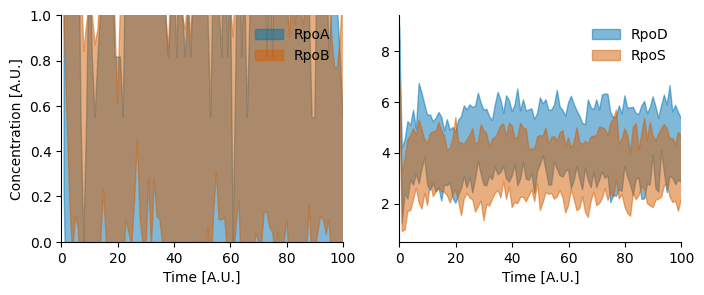

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

# ax[0].plot(data1.index, data1['obs_rpoA_prot'], label = '__NOLABEL__', color = palette[0])
# ax[0].plot(data1.index, data1['obs_rpoB_prot'], label = '__NOLABEL__', color = palette[3])
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoA_free_prot'] + stdv['obs_rpoA_free_prot'], 
                   avrg['obs_rpoA_free_prot'] - stdv['obs_rpoA_free_prot'],
                   label = 'RpoA', **{'color' : palette[0], 'alpha' : 0.5})
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoB_free_prot'] + stdv['obs_rpoB_free_prot'], 
                   avrg['obs_rpoB_free_prot'] - stdv['obs_rpoB_free_prot'],
                   label = 'RpoB', **{'color' : palette[3], 'alpha' : 0.5})

# ax[1].plot(data1.index, data1['obs_rpoD_prot'], label = '__NOLABEL__', color = palette[0])
# ax[1].plot(data1.index, data1['obs_rpoS_prot'], label = '__NOLABEL__', color = palette[3])
ax[1].fill_between(avrg.index, 
                   avrg['obs_rpoD_free_prot'] + stdv['obs_rpoD_free_prot'], 
                   avrg['obs_rpoD_free_prot'] - stdv['obs_rpoD_free_prot'],
                   label = 'RpoD', **{'color' : palette[0], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_rpoS_free_prot'] + stdv['obs_rpoS_free_prot'], 
                   avrg['obs_rpoS_free_prot'] - stdv['obs_rpoS_free_prot'],
                   label = 'RpoS', **{'color' : palette[3], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].set_xlim(left = 0, right = 100)
ax[0].set_ylim(bottom = 0, top = 1)

ax[1].set_xlabel('Time [A.U.]')
ax[1].set_xlim(left = 0, right = 100)
# ax[1].set_ylim(bottom = 0, top = 2)

ax[0].legend(frameon = False)
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('fig0_model_variant2_internal_terminator.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

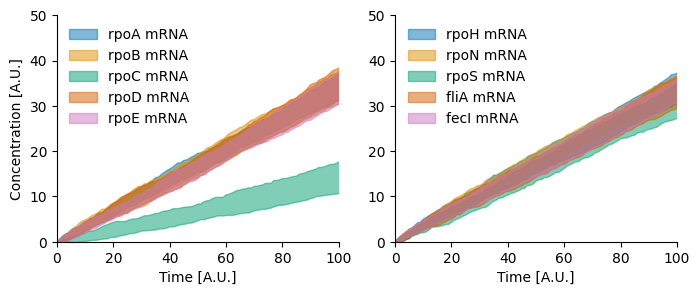

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

# ax[0].plot(data1.index, data1['obs_rpoA_prot'], label = '__NOLABEL__', color = palette[0])
# ax[0].plot(data1.index, data1['obs_rpoB_prot'], label = '__NOLABEL__', color = palette[3])
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoA_rna'] + stdv['obs_rpoA_rna'], 
                   avrg['obs_rpoA_rna'] - stdv['obs_rpoA_rna'],
                   label = 'rpoA mRNA', **{'color' : palette[0], 'alpha' : 0.5})
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoB_rna'] + stdv['obs_rpoB_rna'], 
                   avrg['obs_rpoB_rna'] - stdv['obs_rpoB_rna'],
                   label = 'rpoB mRNA', **{'color' : palette[1], 'alpha' : 0.5})
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoC_rna'] + stdv['obs_rpoC_rna'], 
                   avrg['obs_rpoC_rna'] - stdv['obs_rpoC_rna'],
                   label = 'rpoC mRNA', **{'color' : palette[2], 'alpha' : 0.5})
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoD_rna'] + stdv['obs_rpoD_rna'], 
                   avrg['obs_rpoD_rna'] - stdv['obs_rpoD_rna'],
                   label = 'rpoD mRNA', **{'color' : palette[3], 'alpha' : 0.5})
ax[0].fill_between(avrg.index, 
                   avrg['obs_rpoE_rna'] + stdv['obs_rpoE_rna'], 
                   avrg['obs_rpoE_rna'] - stdv['obs_rpoE_rna'],
                   label = 'rpoE mRNA', **{'color' : palette[4], 'alpha' : 0.5})

# ax[1].plot(data1.index, data1['obs_rpoD_prot'], label = '__NOLABEL__', color = palette[0])
# ax[1].plot(data1.index, data1['obs_rpoS_prot'], label = '__NOLABEL__', color = palette[3])
ax[1].fill_between(avrg.index, 
                   avrg['obs_rpoH_rna'] + stdv['obs_rpoH_rna'], 
                   avrg['obs_rpoH_rna'] - stdv['obs_rpoH_rna'],
                   label = 'rpoH mRNA', **{'color' : palette[0], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_rpoN_rna'] + stdv['obs_rpoN_rna'], 
                   avrg['obs_rpoN_rna'] - stdv['obs_rpoN_rna'],
                   label = 'rpoN mRNA', **{'color' : palette[1], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_rpoS_rna'] + stdv['obs_rpoS_rna'], 
                   avrg['obs_rpoS_rna'] - stdv['obs_rpoS_rna'],
                   label = 'rpoS mRNA', **{'color' : palette[2], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_fliA_rna'] + stdv['obs_fliA_rna'], 
                   avrg['obs_fliA_rna'] - stdv['obs_fliA_rna'],
                   label = 'fliA mRNA', **{'color' : palette[3], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_fecI_rna'] + stdv['obs_fecI_rna'], 
                   avrg['obs_fecI_rna'] - stdv['obs_fecI_rna'],
                   label = 'fecI mRNA', **{'color' : palette[4], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].set_xlim(left = 0, right = 100)
ax[0].set_ylim(bottom = 0, top = 50)

ax[1].set_xlabel('Time [A.U.]')
ax[1].set_xlim(left = 0, right = 100)
ax[1].set_ylim(bottom = 0, top = 50)

ax[0].legend(frameon = False, loc = 'upper left')
ax[1].legend(frameon = False, loc = 'upper left')

seaborn.despine()
plt.savefig('fig1_model_variant2_internal_terminator.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()